# Non-Linear Optimization: Multivariable Functions
In this exercise, the goal is to minimize the function

$$
f(x, y) = e^{-x^2 - y^2} \sin(x) \cos(y),
$$
which combines exponential decay with sinusoidal variations. This makes it a compelling case for gradient descent optimization.
Unlike typical loss functions used in machine learning, where minimization is performed with respect to model parameters and data, here the aim is directly to find the values of $x$ and $y$ that minimize $f(x, y)$. In this context, $f(x, y)$ serves as a measure of error when evaluated with respect to the model parameters. Besides $x$ and $y$ are not treated as model parameters but simply as variables within the mathematical function.
## Steps
The following steps will be needed
- Compute partial derivatives to calculate the gradient in a point.
- Calculating forward (prediction) and backward (gradient steps) passes of the function.
- Iteratively using the forward and backward passes to optimize the function.


<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#forward">Task 1: Forward pass</a>
            </li>
            <li>
            <a href="#testing">Task 2: Explain the function</a>
            </li>
            <li>
            <a href="#partial">Task 3: Backward pass pen and paper</a>
            </li>
            <li>
            <a href="#partial1">Task 4: Backward implementation</a>
            </li>
            <li>
            <a href="#partial2">Task 5: Gradient descent</a>
            </li>
            <li>
            <a href="#plotting">Task 6: Optimization path</a>
            </li>
            <li>
            <a href="#reflection">Task 7: Reflection</a>
            </li>
        </ul>
    </div>
</article>

## Class Implementation
The function $f(x, y)$ and its gradient descent optimization will be implemented within the `ExpTrig`
 class defined in the cell below
The class includes the following methods, which must be implemented in the subsequent tasks.
1. `forward`
  must return the function value of `f(x,y)`
 e.g., the predictions
2. `df_dx`
  must return the partial derivative of the function with respect to `x`

3. `df_dy`
 must return the partial derivative of the function with respect to `y`

4. `backward`
 must return the gradient of `f(x,y)`
 as a tuple `(df_dx, df_dy)`
. The naming 'backward' is used due to its reference to backpropagation.
5. `display_function`
 makes a figure of the function defined in `forward`
.



In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class ExpTrig:

    def forward(self, x, y):
        """
        Args:
        x: x-values (Can be single float or 1D array)
        y: y-values (Can be single float or 1D array)

        Returns:
        The function values of f (size-like x and y)
        """
        f_x_y = np.exp(-x**2 - y**2) * np.sin(x) * np.cos(y)
        return f_x_y

    def df_dx(self, x,y):
        """
        Args:
        x: x-values (Can be single float or 1D numpy array)
        y: y-values (Can be single float or 1D numpy array)

        Returns:
        The partial derivative of f with respect to x (size-like x and y)
        """
        df_dx = np.exp(-x**2 - y**2) * (np.cos(x) * np.cos(y) - 2*x*np.sin(x)*np.cos(y))
        return df_dx

    def df_dy(self, x,y):
        """
        Args:
        x: x-values (Can be single float or 1D numpy array)
        y: y-values (Can be single float or 1D numpy array)

        Returns:
        The partial derivative of f with respect to y (size-like x and y)
        """
        df_dy = np.exp(-x**2 - y**2) * (-np.sin(x) * np.sin(y) - 2*y*np.cos(x)*np.sin(y))
        return df_dy

    def backward(self, x, y):
        """
        args:
        x: x-values
        y: y-values
        Returns:
        Patial derivatives of the function (i.e. the gradient) as a tuple
        """
        df_dx = self.df_dx(x, y)
        df_dy = self.df_dy(x, y)
        return (df_dx, df_dy)

    def display_function(self):
        
        x = np.linspace(-2, 2, 400)
        y = np.linspace(-2, 2, 400)
        x, y = np.meshgrid(x, y)

        z = self.forward(x,y)

        # Create a 3D plot  
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(x, y, z, cmap='viridis', alpha=0.8)
        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')
        ax.set_zlabel('f(x, y)')
        ax.set_title('Surface of f(x, y) = e^{-x^2 - y^2} sin(x) cos(y)')
        plt.show()

<article class="message task"><a class="anchor" id="forward"></a>
    <div class="message-header">
        <span>Task 1: Forward pass</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Implement the  `forward`
 function in the class.
2. Run the cell below to visualize the function. 



</div></article>



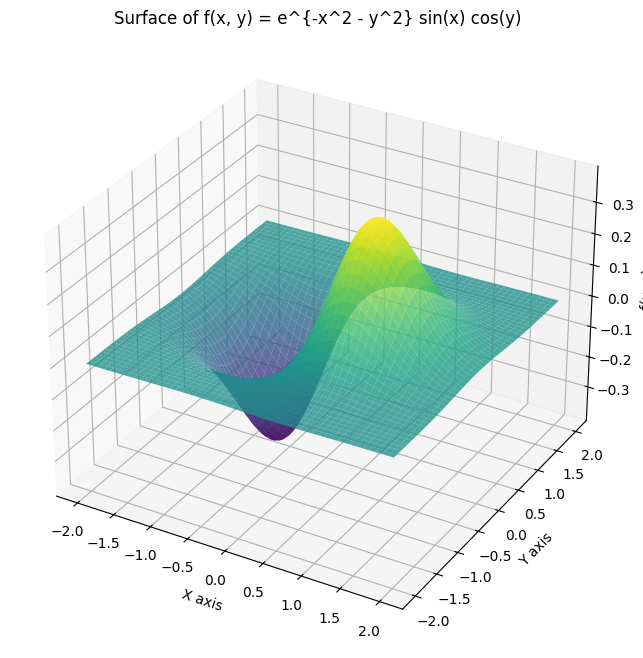

In [2]:
# Grid of x, y points
f = ExpTrig()

f.display_function()

<article class="message task"><a class="anchor" id="testing"></a>
    <div class="message-header">
        <span>Task 2: Explain the function</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


Use the plot to identify the minima of the function and discuss potential challenges associated with gradient-based optimization.


</div></article>



In [0]:
# The given function is: f(x, y) = e^{-x^2 - y^2} * sin(x) * cos(y)
# It combines:
# 1. A Gaussian term (e^{-x^2 - y^2}) that decays as x and y move away from the origin.
# 2. A trigonometric term (sin(x) * cos(y)) that oscillates between -1 and 1.
#
# As a result:
# - The function surface is localized around the origin due to the Gaussian decay.
# - Oscillatory behavior creates multiple local maxima and minima within the Gaussian envelope.
#
# Identifying minima:
# - The global minimum is likely near the origin (x, y) = (0, 0).
# - However, due to the oscillatory nature, the actual minima might shift slightly based on the sign of sin(x) and cos(y).
# - Multiple local minima are distributed in a wave-like pattern around the center.
#
# Challenges with gradient-based optimization:
# 1. Multiple local minima and maxima:
#    - Oscillations create a "bumpy" surface, where gradient descent can get stuck in a local minimum.
# 2. Flat regions:
#    - The Gaussian decay flattens the gradient as x and y move away from the center, leading to slow convergence.
# 3. Steep oscillatory regions:
#    - Near oscillations, gradients may lead to large jumps, causing instability during optimization.
# 4. Learning rate sensitivity:
#    - A high learning rate might overshoot minima, while a low rate slows convergence, particularly in flat regions.
#
# Strategies to address these challenges:
# - Initialize optimization near the origin, as most significant minima are concentrated close to the center.
# - Use gradient clipping to prevent overly large updates in steep oscillatory regions.
# - Employ adaptive optimizers like Adam or RMSprop to adjust the learning rate based on gradient behavior.

## Gradient Descent
**Gradient Descent** is an iterative optimization method that updates input variables step by step by using the gradient of a function with respect to these variables. The updates are made by moving in the negative direction of the gradient, which corresponds to the direction of the steepest decrease in the function's value. The update rule is given by:

$$ x_{t+1} = x_t - \lambda \nabla_x f(x_t) $$
where:
- $x_t \in \mathbb{R}^n$ represents the input to the function $f(x)$ at iteration $t$,
- $x_{t+1}$ is the updated input at iteration $t+1$,
- $\nabla_x f(x_t)$ is the gradient of $f$ with respect to $x$ at $x_t$,
- $\lambda$ is the learning rate, which controls the size of each step, and
- $t$ is the current iteration step.

<article class="message task"><a class="anchor" id="partial"></a>
    <div class="message-header">
        <span>Task 3: Backward pass pen and paper</span>
        <span class="has-text-right">
          <i class="bi bi-infinity"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


On a piece of paper, show that the partial derivatives of the function $f(x, y)$ with respect to $x$ and $y$, i.e.,
$\frac{\partial f}{\partial x} \quad \text{and} \quad \frac{\partial f}{\partial y}$ are 

$$

\frac{\partial f}{\partial x} = -2xe^{-x^2 - y^2} \sin(x) \cos(y) + e^{-x^2 - y^2} \cos(x) \cos(y) 

$$

$$

\frac{\partial f}{\partial y} = -2ye^{-x^2 - y^2} \sin(x) \cos(y) - e^{-x^2 - y^2} \sin(x) \sin(y) 

$$
<article class="message is-warning">
  <div class="message-header">Hint</div>
  <div class="message-body">

  Recall the _chain rule_ and and _product rule_ for finding the partial derivatives for $x$ and $y$.


  </div>
</article>


</div></article>



### Task 3: Backward Pass Pen and Paper

#### Solution:

The given function is:

$$
f(x, y) = e^{-x^2 - y^2} \sin(x) \cos(y)
$$

We need to find the partial derivatives of $f(x, y)$ with respect to $x$ and $y$.

---

#### 1. Partial Derivative with Respect to $x$:

Using the **product rule** and **chain rule**, let:

$$
f(x, y) = g(x, y) \cdot h(x, y),
$$
where:
- $g(x, y) = e^{-x^2 - y^2}$,
- $h(x, y) = \sin(x) \cos(y)$.

The derivative of $f(x, y)$ with respect to $x$ is:

$$
\frac{\partial f}{\partial x} = \frac{\partial g}{\partial x} \cdot h(x, y) + g(x, y) \cdot \frac{\partial h}{\partial x}.
$$

Now calculate each term:

1. $\frac{\partial g}{\partial x} = -2x e^{-x^2 - y^2}$,
2. $\frac{\partial h}{\partial x} = \cos(x) \cos(y)$.

Substituting these into the product rule:

$$
\frac{\partial f}{\partial x} = (-2x e^{-x^2 - y^2}) \cdot (\sin(x) \cos(y)) + (e^{-x^2 - y^2}) \cdot (\cos(x) \cos(y)).
$$

Simplify:

$$
\frac{\partial f}{\partial x} = -2x e^{-x^2 - y^2} \sin(x) \cos(y) + e^{-x^2 - y^2} \cos(x) \cos(y).
$$

---

#### 2. Partial Derivative with Respect to $y$:

Similarly, using the **product rule**, the derivative of $f(x, y)$ with respect to $y$ is:

$$
\frac{\partial f}{\partial y} = \frac{\partial g}{\partial y} \cdot h(x, y) + g(x, y) \cdot \frac{\partial h}{\partial y}.
$$

Now calculate each term:

1. $\frac{\partial g}{\partial y} = -2y e^{-x^2 - y^2}$,
2. $\frac{\partial h}{\partial y} = -\sin(x) \sin(y)$.

Substituting these into the product rule:

$$
\frac{\partial f}{\partial y} = (-2y e^{-x^2 - y^2}) \cdot (\sin(x) \cos(y)) + (e^{-x^2 - y^2}) \cdot (-\sin(x) \sin(y)).
$$

Simplify:

$$
\frac{\partial f}{\partial y} = -2y e^{-x^2 - y^2} \sin(x) \cos(y) - e^{-x^2 - y^2} \sin(x) \sin(y).
$$

---

#### Final Answer:

$$
\frac{\partial f}{\partial x} = -2x e^{-x^2 - y^2} \sin(x) \cos(y) + e^{-x^2 - y^2} \cos(x) \cos(y),
$$

$$
\frac{\partial f}{\partial y} = -2y e^{-x^2 - y^2} \sin(x) \cos(y) - e^{-x^2 - y^2} \sin(x) \sin(y).
$$

<article class="message task"><a class="anchor" id="partial1"></a>
    <div class="message-header">
        <span>Task 4: Backward implementation</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


Implement the following functions in the `ExpTrig`
 class:
1. `df_dx`
 and `df_dy`
  which return the values of the partial derivatives for a given `x`
 and `y`
. See the results in the previous task (in case you didn't complete the previous task the result is given there)


2. `backward`
 method so that it returns the gradient evaluated at a given x, y.




</div></article>



In [3]:
class ExpTrig:
    def __init__(self):
        pass

    def forward(self, x, y):
        return np.exp(-x**2 - y**2) * np.sin(x) * np.cos(y)
    
    def df_dx(self, x, y):
        term1 = -2 * x * np.exp(-x**2 - y**2) * np.sin(x) * np.cos(y)
        term2 = np.exp(-x**2 - y**2) * np.cos(x) * np.cos(y)
        return term1 + term2
    
    def df_dy(self, x, y):
        term1 = -2 * y * np.exp(-x**2 - y**2) * np.sin(x) * np.cos(y)
        term2 = -np.exp(-x**2 - y**2) * np.sin(x) * np.sin(y)
        return term1 + term2
    
    def backward(self, x, y):
        df_dx = self.df_dx(x, y)
        df_dy = self.df_dy(x, y)
        return df_dx, df_dy

## Optimization Method
<article class="message task"><a class="anchor" id="partial2"></a>
    <div class="message-header">
        <span>Task 5: Gradient descent</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


The following steps outline the implementation of gradient descent for the function $f(x, y)$ , which is defined in the `ExpTrig`
 class. The implementation of `optimize_function`
 method involves several tasks that must be completed. Implement each of these steps in the cell below.
1. **Initialize Coordinates**: Start by initializing `x`
 and `y`
 as `start_x`
 and `start_y`
, respectively. These are your starting guesses for the optimization.

2. **Initialize History Lists**: Create two lists, `x_all`
 and `y_all`
, to record the coordinates visited during the optimization.

3. **Start Gradient Descent Loop**: Implement a for-loop that iterates a specified number of times. Within each iteration:
    - Use the `backward`
 method of `func`
 to compute the gradients at the current estimate `(x, y)`
.
    - Update `x`
 and `y`
 using the optimization steps by taking a step in the direction opposite to the gradient, scaled by the `learning_rate`
. 
    - Logging (optional): Add a logging mechanism to display the current state of the optimization. For example, print the iteration number, values `x`
, `y`
, and the function value, $f(x,y)$ at these coordinates every 25 iterations.
    - Record History: append the current values of `x`
 and `y`
 to `x_all`
 and `y_all`
, respectively.


4. **Return the Result**: the function should return `x_all`
 and `y_all`
.




</div></article>



In [8]:
def optimize_function(func, start_x, start_y, learning_rate, iterations):
    """
    Optimize a given function using gradient descent.

    Args:
    - func (Function): A function object that must have 'forward' and 'backward' methods.
                       The 'forward' method computes the function value at a given point (x, y),
                       and the 'backward' method computes the gradient at that point.
    - start_x (float): The starting x-coordinate for the optimization.
    - start_y (float): The starting y-coordinate for the optimization.
    - learning_rate (float): The step size for each iteration in the gradient descent.
    - iterations (int): The total number of iterations for the optimization process.

    Returns:
    - x_all (list of float): List of all x-coordinates of the points visited during the optimization.
    - y_all (list of float): List of all y-coordinates of the points visited during the optimization.

    This function performs gradient descent on the provided function object. Starting from 
    (start_x, start_y), it iteratively moves in the direction opposite to the gradient, 
    with step sizes determined by the learning rate. The function's value and current 
    coordinates are printed every 25 iterations. The function returns the history of 
    coordinates visited during the optimization.
    """
    x_all = []
    y_all = []
    x = start_x
    y = start_y
    for i in range(iterations):
        grad_x, grad_y = func.backward(x, y)
        x -= learning_rate * grad_x
        y -= learning_rate * grad_y
        x_all.append(x)
        y_all.append(y)
        if (i) % 25 == 0:
            print(f"Iteration {i + 1}: f({x:.4f}, {y:.4f}) = {func.forward(x, y):.4f}")
    return x_all, y_all

# Example optimization
x_arr, y_arr = optimize_function(ExpTrig(), start_x=-1.5, start_y=-1., learning_rate=0.2, iterations=100)

Iteration 1: f(-1.4878, -0.9851) = -0.0228
Iteration 26: f(-0.6685, -0.0596) = -0.3943
Iteration 51: f(-0.6533, -0.0001) = -0.3967
Iteration 76: f(-0.6533, -0.0000) = -0.3967


<article class="message task"><a class="anchor" id="plotting"></a>
    <div class="message-header">
        <span>Task 6: Optimization path</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to plot the optimization path of the `optimize_function`
.
2. Identify areas where the optimization slows down or oscillates and explain why might these occur?
3. How might a different learning rate affect the optimization path? Consider the possibilities of paths that overshoot, oscillate, or stagnate.
4. How does the shape of the surface (e.g., steep slopes or flat regions) influence the behavior of the optimization path?



</div></article>



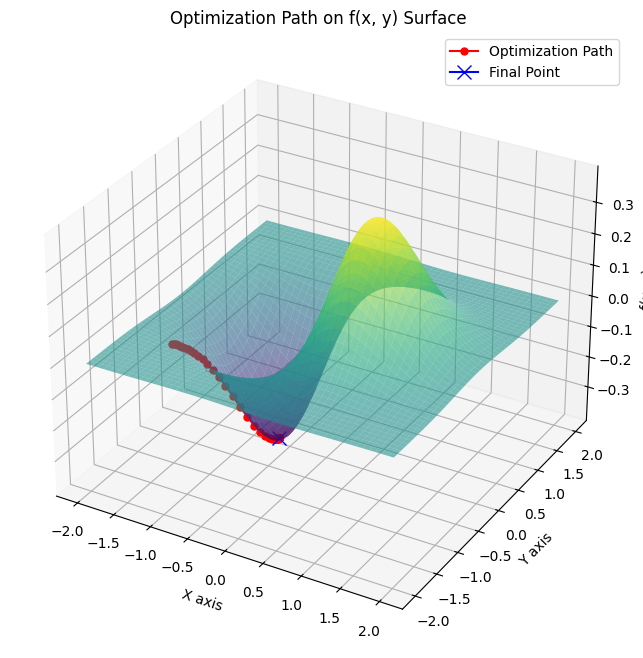

In [9]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
x, y = np.meshgrid(x, y)
z = ExpTrig().forward(x,y)

# Assuming you have lists `x_values` and `y_values` containing the optimization path
x_values = np.array(x_arr)
y_values = np.array(y_arr)
z_values = np.exp(-np.array(x_values)**2 - np.array(y_values)**2) * np.sin(x_values) * np.cos(y_values)

# Plot the optimization path on the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', alpha=0.6)
ax.plot(x_values, y_values, z_values, marker='o', color='r', markersize=5, label='Optimization Path')
ax.plot(x_values[-1], y_values[-1], z_values[-1], marker='x', color='b', markersize=10, label='Final Point')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('f(x, y)')
ax.set_title('Optimization Path on f(x, y) Surface')
ax.legend()
plt.show()

<article class="message task"><a class="anchor" id="reflection"></a>
    <div class="message-header">
        <span>Task 7: Reflection</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


Assess the proficiency of the of the gradient descent algorithm
1. Use gradient descent to find the minimum using the following starting points:


$$
x_{0}=1.5, y_{0}=1.5 
$$

$$
x_{0}=-1.5, y_{0}=-1.5
$$

$$
x_{0}=-1.0, y_{0}=1.3
$$

$$
x_{0}=1.2, y_{0}=-1.5
$$
2. In the cell below describe the main observations from these optimizations.
3. Explain why the optimization process sometimes fails to find the **global** minimum?
4. Use different learning rates (try 0.1, 0.5, 1.0) and discuss how they affect the results.
5. List two issues commonly encountered in gradient descent optimization and provide a potential solution for each problem:    - Describe each issue and explain why it poses a challenge.
    - Propose a potential solution to address each issue effectively.





</div></article>



In [0]:
# 'frames' refers to the variable that stores data loaded using the nn_util.load_frames function.
# This function is typically used to load a series of frames (e.g., video frames or data snapshots) 
# from a specified file path, such as "data/frames.csv".
# Ensure that the path is correct and the file exists at the specified location to avoid errors.